### Курс 1, неделя 4, раздел 2

#### Задача 1
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

#### Решение
Буду использовать распределение арксинуса

In [1]:
import numpy as np
from scipy import stats as sp_stat
from matplotlib import pyplot as plt
%matplotlib inline

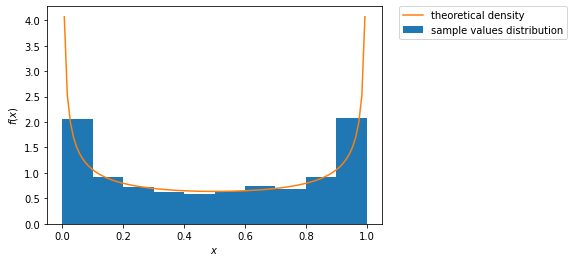

In [2]:
# генерирую и наношу на график выборку
arcsine_rv = sp_stat.arcsine() # можно подставить любую случайную величину
rv_sample = arcsine_rv.rvs(1000)
plt.hist(
    rv_sample,
    density=True,
    label='sample values distribution'
)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
# генерирую и наношу на график теоретическую плотность распределения
theo_x = np.linspace(
    arcsine_rv.ppf(0.05),
    arcsine_rv.ppf(0.95),
    100
)
plt.plot(theo_x, arcsine_rv.pdf(theo_x), label='theoretical density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
# беру из случайной величины rv выборку n_samples раз (размером sample_size) и считаю для каждой такой выборки среднее
def boot(rv, n_samples, sample_size):
    sample_of_sample_means = []
    for i in range(n_samples):
        sample_of_sample_means.append(
            rv.rvs(sample_size).mean()
        )
    return sample_of_sample_means


In [ ]:
# запускаю функцию выше с заданными параметрами
# считаю по расчитанным теоретическим параметрам функцию плотности норм распределения
# наношу всё это на один и тот же график, чтобы сравнить визуально
def plot_experiment(
        rv,
        n_samples,
        sample_sizes = [],
        bins=10
):
    # создаю заготовку для нескольких графиков внутри одного полотна,
    # чтобы сравнение разброса вокруг среднего было более наглядным
    fig, axs = plt.subplots(len(sample_sizes), sharex='all')
    # прохожусь по кажому значению размера выборки и строю для него свой график
    for i ,sample_size in enumerate(sample_sizes):
        # рисую гистограмму среднего средних
        sample_of_means = boot(rv, n_samples, sample_size)
        axs[i].hist(
            sample_of_means,
            density=True,
            bins=bins,
            label='sample values distribution',
            color='#e75480'
        )
        # рассчитываю теоретические среднее и дисперсию для заданной случайной величины
        theoretical_mu, theoretical_var = rv.stats(moments='mv')
        # среднее при этом будет равно среднему нормального распределения, которое
        # аппроксимирует выборку а дисперсия будет в sample_size раз больше, чем у
        # аппроксимируюшего нормального распределения, т.е. для получения нужного параметра
        # sigma её нужно будет поделить на sample_size
        theoretical_var /= sample_size

        # считаю теоретическое ско, т.к. функция принимает его, а не дисперсию
        theoretical_sigma = np.sqrt(theoretical_var)
        # рисую плотность нормального распределения по расчитанным теоретическим параметрам
        norm_rv = sp_stat.norm(theoretical_mu, theoretical_sigma)
        theo_x = np.linspace(
            norm_rv.ppf(0.001),
            norm_rv.ppf(0.999),
            100
        )
        axs[i].plot(
            theo_x,
            norm_rv.pdf(theo_x),
            label='approximating normal distribution',
            color='#680f29'
        )
        axs[i].set_facecolor('#fffdd0')
        # подписываю, по сколько экземпляров делал выборки
        axs[i].text(
            0.99,
            0.95,
            f'sample size: {sample_sizes[i]}',
            va='top',
            ha='right',
            transform=axs[i].transAxes
        )
    # добавляю ко всем графикам общие названия для осей и общую легенду
    fig.add_subplot(111, frameon=False)
    axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel('$\overline{x}$')
    plt.ylabel('$f(\overline{x})$')

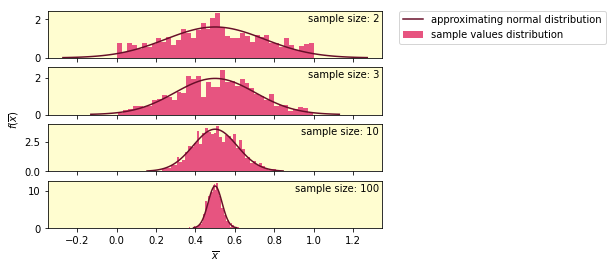

In [ ]:
plot_experiment(
    rv=arcsine_rv,
    n_samples=1000,
    sample_sizes=[2, 3, 10, 100],
    bins=40
)

Для сравнения можно провести тот же эксперимент с экспоненциально распределённой случайной величиной:

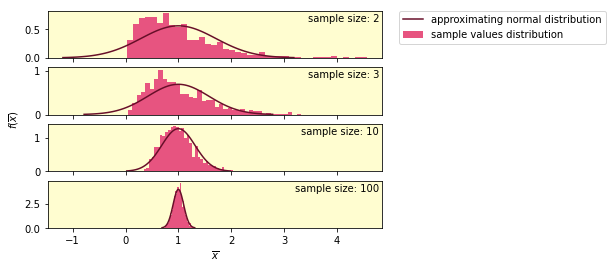

In [ ]:
exp_rv = sp_stat.expon()
plot_experiment(
    rv=exp_rv,
    n_samples=1000,
    sample_sizes=[2, 3, 10, 100],
    bins=40
)


И с равномерно распределённой случайной величиной:

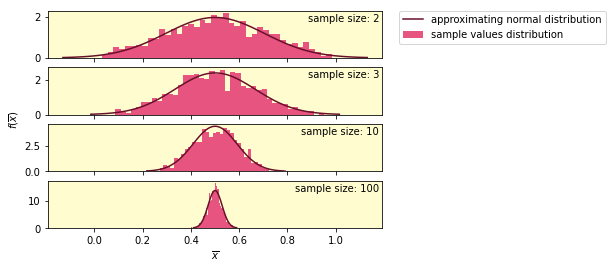

In [ ]:
exp_rv = sp_stat.uniform()
plot_experiment(
    rv=exp_rv,
    n_samples=1000,
    sample_sizes=[2, 3, 10, 100],
    bins=40
)


**Выводы:**
* Какое бы распределение мы ни выбрали, при повышении количества наблюдений в выборке, её среднее всё больше и больше тяготеет к действительному среднему выбранной случайной величины.
* При этом чем больше размер выборки, тем точнее описывается распределение выборочных средних теоретически посчитанным нормальным распределением (это видно на графиках -- чем мы ниже спускаемся, тем менее заметны разрывы между гистограммой и теоретической функцией плотности нормального распределения).